In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Get The Data

In [324]:
startups = pd.read_csv('C:/Users/hpc/OneDrive/Desktop/DT/ML/50 startups app ml/50_Startups.csv')
startups.head(10)

,RD Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [325]:
startups['R&D_Spend'] = startups['RD Spend']
startups['Marketing_Spend'] = startups['Marketing Spend']

In [326]:
startups.drop('RD Spend', axis=1, inplace=True)
startups.drop('Marketing Spend', axis=1, inplace=True)

In [327]:
# Saving a DataFrame to a CSV file
startups.to_csv('new_50startups.csv', index=False)

In [328]:
startups = pd.read_csv('C:/Users/hpc/OneDrive/Desktop/DT/ML/50 startups app ml/new_50startups.csv')
startups.head(10)

,Administration,State,Profit,R&D_Spend,Marketing_Spend
0,136897.80,New York,192261.83,165349.20,471784.10
1,151377.59,California,191792.06,162597.70,443898.53
2,101145.55,Florida,191050.39,153441.51,407934.54
3,118671.85,New York,182901.99,144372.41,383199.62
4,91391.77,Florida,166187.94,142107.34,366168.42
5,99814.71,New York,156991.12,131876.90,362861.36
6,147198.87,California,156122.51,134615.46,127716.82
7,145530.06,Florida,155752.60,130298.13,323876.68
8,148718.95,New York,152211.77,120542.52,311613.29
9,108679.17,California,149759.96,123334.88,304981.62


In [329]:
startups.head(5)

,Administration,State,Profit,R&D_Spend,Marketing_Spend
0,136897.80,New York,192261.83,165349.20,471784.10
1,151377.59,California,191792.06,162597.70,443898.53
2,101145.55,Florida,191050.39,153441.51,407934.54
3,118671.85,New York,182901.99,144372.41,383199.62
4,91391.77,Florida,166187.94,142107.34,366168.42


In [330]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Administration   50 non-null     float64
 1   State            50 non-null     object 
 2   Profit           50 non-null     float64
 3   R&D_Spend        50 non-null     float64
 4   Marketing_Spend  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [331]:
startups.describe()

,Administration,Profit,R&D_Spend,Marketing_Spend
count,50.000000,50.000000,50.000000,50.000000
mean,121344.639600,112012.639200,73721.615600,211025.097800
std,28017.802755,40306.180338,45902.256482,122290.310726
min,51283.140000,14681.400000,0.000000,0.000000
25%,103730.875000,90138.902500,39936.370000,129300.132500
50%,122699.795000,107978.190000,73051.080000,212716.240000
75%,144842.180000,139765.977500,101602.800000,299469.085000
max,182645.560000,192261.830000,165349.200000,471784.100000


array([[<Axes: title={'center': 'Administration'}>,
        <Axes: title={'center': 'Profit'}>],
       [<Axes: title={'center': 'R&D_Spend'}>,
        <Axes: title={'center': 'Marketing_Spend'}>]], dtype=object)

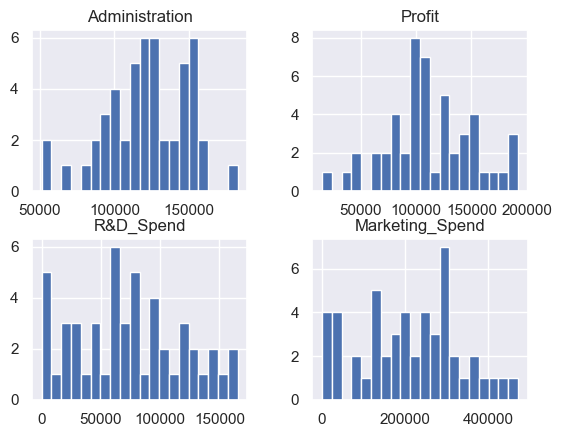

In [332]:
startups.hist( bins=20)

the data is in different scale

In [333]:
from sklearn.model_selection import train_test_split
train_data , test_data = train_test_split(startups , test_size=0.2 , random_state=0)

In [334]:
train_data.shape , test_data.shape

((40, 5), (10, 5))

In [335]:
train_data.Profit.describe() , test_data.Profit.describe()

(count        40.000000
 mean     109446.447250
 std       40981.182781
 min       14681.400000
 25%       87713.295000
 50%      107978.190000
 75%      133028.825000
 max      192261.830000
 Name: Profit, dtype: float64,
 count        10.00000
 mean     122277.40700
 std       37696.02975
 min       77798.83000
 25%       98933.26500
 50%      107680.28000
 75%      145656.31250
 max      191050.39000
 Name: Profit, dtype: float64)

# EDA

In [336]:
train_data.select_dtypes(include=['number']).corr()['Profit'].nlargest()

Profit             1.000000
R&D_Spend          0.972090
Marketing_Spend    0.750735
Administration     0.332579
Name: Profit, dtype: float64

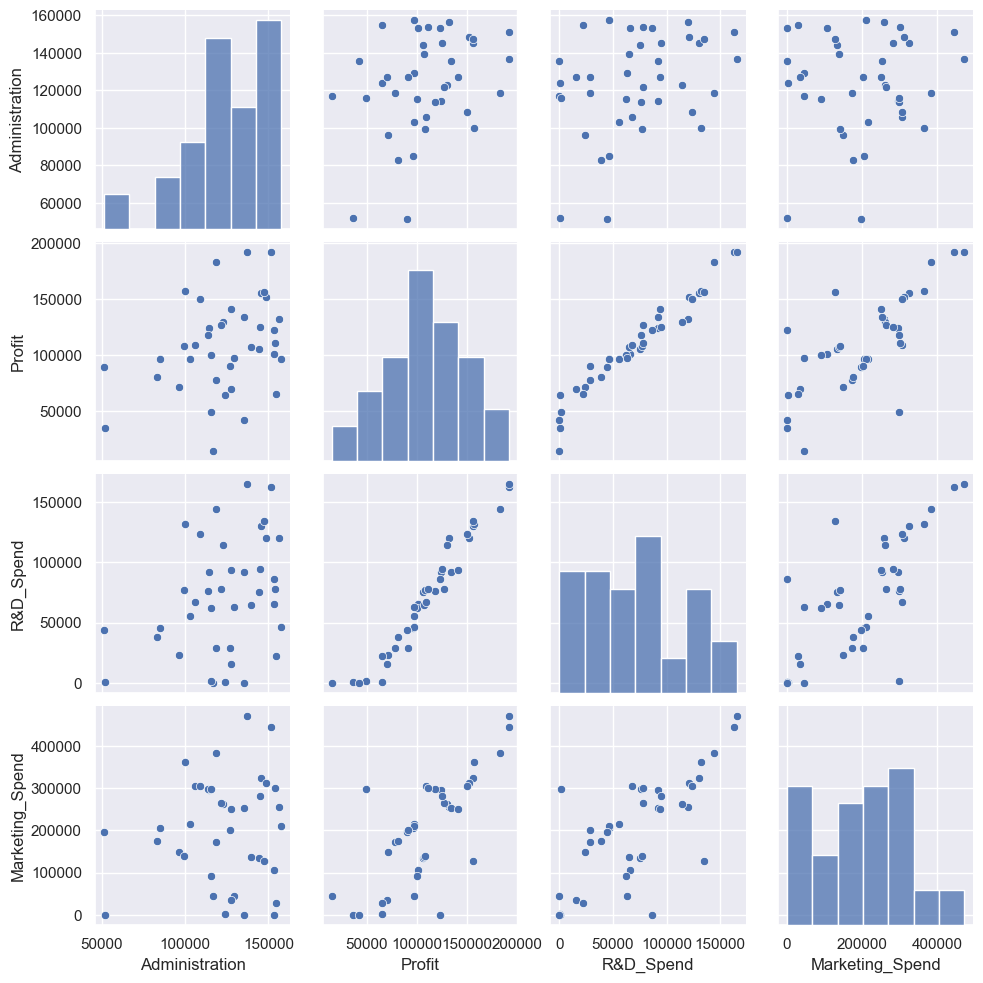

In [337]:
sns.pairplot(train_data)

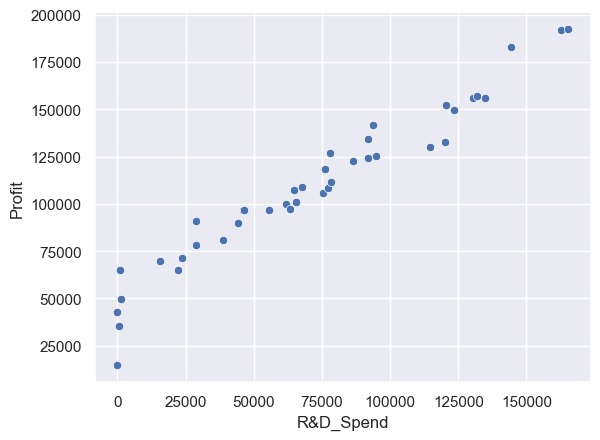

In [338]:
sns.scatterplot(data=train_data, x='R&D_Spend', y='Profit')
plt.show()

 The most promising attribute to predict the Profit is the R&D Spend

# Cleaning Data

In [339]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Administration   50 non-null     float64
 1   State            50 non-null     object 
 2   Profit           50 non-null     float64
 3   R&D_Spend        50 non-null     float64
 4   Marketing_Spend  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


* no missing values

In [340]:
startups.select_dtypes(include=['number']).quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1])

,Administration,Profit,R&D_Spend,Marketing_Spend
0.25,103730.8750,90138.9025,39936.370,129300.1325
0.50,122699.7950,107978.1900,73051.080,212716.2400
0.75,144842.1800,139765.9775,101602.800,299469.0850
0.90,153540.0420,157910.8020,135364.648,363192.0660
0.95,155763.8440,187383.6100,149360.415,396803.8260
0.99,170419.2564,192031.6427,164000.965,458120.1707
1.00,182645.5600,192261.8300,165349.200,471784.1000


* no outliers

There is not missing values and outlirs so the data already cleaned

# Prepare the Data for Machine Learning Algorithms:

In [341]:
train_features = train_data.drop('Profit',axis=1)
train_labels = train_data['Profit'].copy()

In [342]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , StandardScaler

num_attribs = train_features.select_dtypes(exclude='object').columns.tolist()
cat_attribs = train_features.select_dtypes(include='object').columns.tolist()

num_pipline = make_pipeline(SimpleImputer(),
                            StandardScaler())

cat_pipline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             OneHotEncoder(categories=[['California', 'Florida', 'New York']],
                                            sparse_output=False,  
                                            drop='first'))

full_pipline = ColumnTransformer(transformers=[ ("num", num_pipline, num_attribs),
                                                ("cat", cat_pipline, cat_attribs)])

train_features_prepared = full_pipline.fit_transform(train_features)

Decision Tree

In [343]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

Tree = DecisionTreeRegressor()
Tree.fit(train_features_prepared , train_labels)

# Predictions
tree_predictions = Tree.predict(train_features_prepared)

In [344]:
# Training Accuracy
from sklearn.metrics import r2_score
print('Training Accuracy is : ' , r2_score(train_labels , tree_predictions))

Training Accuracy is :  1.0


* Decision Tree model is overfitting the data.

In [345]:
# Cross Validation for Decision Tree
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(Tree , train_features_prepared , train_labels , scoring = 'r2' , cv=5)

print("Scores : " , tree_scores)
print('main of scores : ' , round(tree_scores.mean(),2))
print('std of scores : ' , round(tree_scores.std(),2))

Scores :  [0.76082243 0.80389753 0.75051654 0.85948558 0.86194347]
main of scores :  0.81
std of scores :  0.05


Fine-Tune Your Model

In [346]:
# Find the best model using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [2,3,4,5,6,7] , 'max_features' : [2,4,6,8,10]}
GridSearchCV = GridSearchCV(Tree , param_grid ,scoring = 'r2' , cv=5)

# fitting
GridSearchCV.fit(train_features_prepared , train_labels)
# best params
GridSearchCV.best_params_

{'max_depth': 4, 'max_features': 6}

In [347]:
# try Cross Validation for Best Decision Tree
tree_best = DecisionTreeRegressor(**GridSearchCV.best_params_)
tree_best.fit(train_features_prepared , train_labels)

# Predictions
tree_best_predicitions = tree_best.predict(train_features_prepared)
print("Score : " , r2_score(train_labels , tree_best_predicitions))

Score :  0.9953922955593303


In [348]:
# Testing Accuracy
test_features = test_data.drop('Profit',axis=1)
test_labels = test_data['Profit'].copy()

test_features_prepared = full_pipline.transform(test_features)

tree_best_predicitions_test = tree_best.predict(test_features_prepared)

print("Score of the Train Data: " , r2_score(train_labels , tree_best_predicitions))
print("Score of the Test Data: " , r2_score(test_labels , tree_best_predicitions_test))

Score of the Train Data:  0.9953922955593303
Score of the Test Data:  0.9685303640793538


* I think We Are Good 

Save my model and pipline

In [349]:
import joblib
joblib.dump(tree_best , 'tree.apk')
joblib.dump(full_pipline , 'full_pipline.apk')

['full_pipline.apk']

Web App

* Decision Tree model is overfitting the data.

In [350]:
%%writefile 50startups_app.py

import streamlit as st
import joblib
import pandas as pd
import numpy as np

# Load the model and pipeline
tree = joblib.load('tree.apk')
full_pipline = joblib.load('full_pipline.apk')  # Corrected the file name to 'full_pipeline.apk'

# Load the data
startups = pd.read_csv('C:/Users/hpc/OneDrive/Desktop/DT/ML/50 startups app ml/new_50startups.csv')

# Title
st.title('50 Startups Profit Prediction')
st.write('This App predicts the Startups Profit')

# Take input from user
RD_Spend = st.slider('R&D_Spend', float(startups['R&D_Spend'].min()), float(startups['R&D_Spend'].max()))
Administration = st.slider('Administration', float(startups['Administration'].min()), float(startups['Administration'].max()))
Marketing_Spend = st.slider('Marketing_Spend', float(startups['Marketing_Spend'].min()), float(startups['Marketing_Spend'].max()))
State = st.selectbox('State', ('New_York', 'California', 'Florida'))

# Store the inputs as a dictionary
user_inputs = {
    'R&D_Spend': RD_Spend,
    'Administration': Administration,
    'Marketing_Spend': Marketing_Spend,
    'State': State
}

# Transform the data into a DataFrame
features = pd.DataFrame(user_inputs, index=[0])  

# Pipeline transformation
features_prepared = full_pipline.transform(features)

# Predictions
prediction = tree.predict(features_prepared)[0]

# Display the prediction
st.subheader('Prediction:')
st.markdown(f'### $ {round(prediction, 2)}')  


Overwriting 50startups_app.py
